In [243]:
import csv

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [244]:
train = pd.read_csv('train.csv', index_col='id')

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
id,,,,,,,,,,,,,,,,,,,,,
1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
2,50,services,married,high.school,unknown,yes,no,cellular,may,mon,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
5,45,admin.,single,university.degree,no,no,no,cellular,nov,tue,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,33,admin.,married,high.school,no,no,no,cellular,aug,fri,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,fri,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22498,25,admin.,married,professional.course,no,yes,no,cellular,may,thu,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no


In [245]:
test = pd.read_csv('test.csv', index_col='id')

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
id,,,,,,,,,,,,,,,,,,,,
22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,mon,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
22502,26,admin.,single,high.school,no,yes,no,cellular,may,thu,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,thu,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,fri,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,wed,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,mon,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80


In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 1 to 22500
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               22500 non-null  int64  
 1   job               22500 non-null  object 
 2   marital           22500 non-null  object 
 3   education         22500 non-null  object 
 4   default           22500 non-null  object 
 5   housing           22500 non-null  object 
 6   loan              22500 non-null  object 
 7   contact           22500 non-null  object 
 8   month             22500 non-null  object 
 9   day_of_week       22500 non-null  object 
 10  duration          22500 non-null  int64  
 11  campaign          22500 non-null  int64  
 12  pdays             22500 non-null  int64  
 13  previous          22500 non-null  int64  
 14  poutcome          22500 non-null  object 
 15  emp_var_rate      22500 non-null  float64
 16  cons_price_index  22500 non-null  float6

In [247]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 22501 to 30000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7500 non-null   int64  
 1   job               7500 non-null   object 
 2   marital           7500 non-null   object 
 3   education         7500 non-null   object 
 4   default           7500 non-null   object 
 5   housing           7500 non-null   object 
 6   loan              7500 non-null   object 
 7   contact           7500 non-null   object 
 8   month             7500 non-null   object 
 9   day_of_week       7500 non-null   object 
 10  duration          7500 non-null   int64  
 11  campaign          7500 non-null   int64  
 12  pdays             7500 non-null   int64  
 13  previous          7500 non-null   int64  
 14  poutcome          7500 non-null   object 
 15  emp_var_rate      7500 non-null   float64
 16  cons_price_index  7500 non-null   flo

In [248]:
numerical_feature = list(test.select_dtypes(exclude='object').columns)
categorical_feature = list(test.select_dtypes(include='object').columns)

numerical_feature, categorical_feature

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp_var_rate',
  'cons_price_index',
  'cons_conf_index',
  'lending_rate3m',
  'nr_employed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'])

In [249]:
for f in categorical_feature:
    print(f'{f} has {train[f].nunique()} unique values')

job has 12 unique values
marital has 4 unique values
education has 8 unique values
default has 3 unique values
housing has 3 unique values
loan has 3 unique values
contact has 2 unique values
month has 10 unique values
day_of_week has 5 unique values
poutcome has 3 unique values


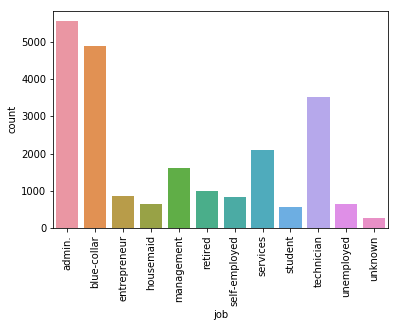

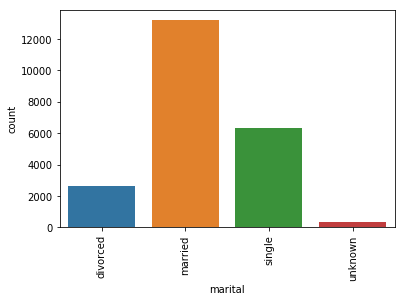

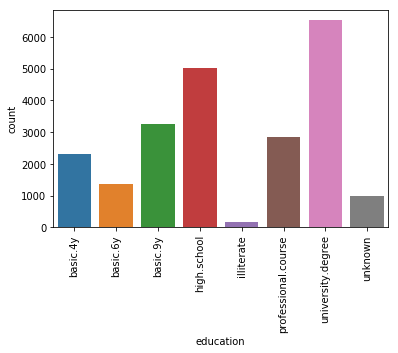

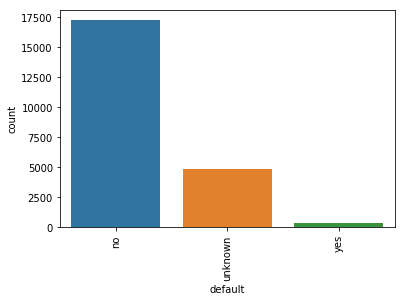

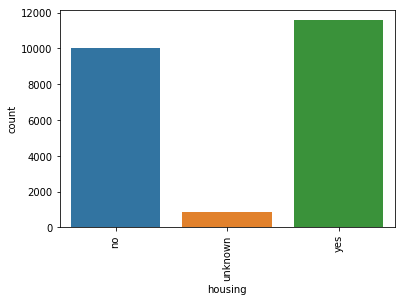

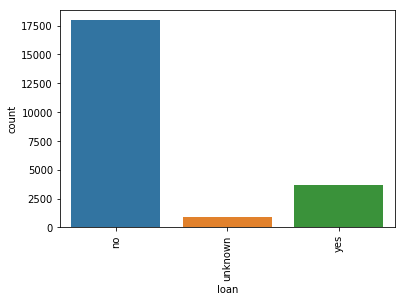

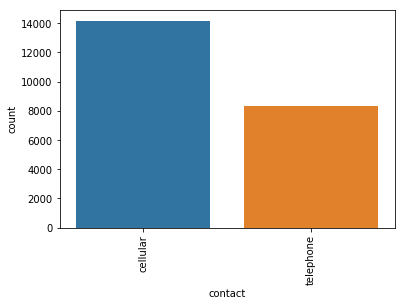

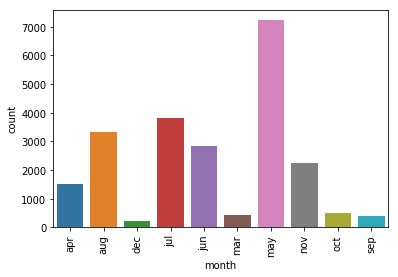

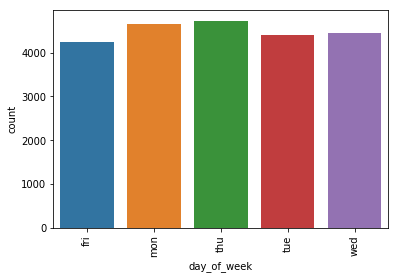

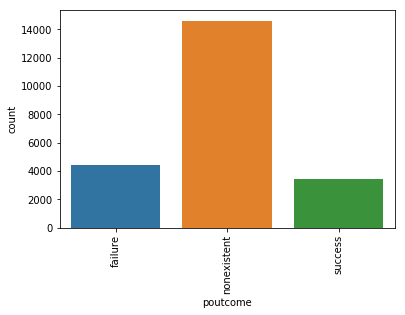

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

for f in categorical_feature:
    sns.countplot(x=f, data=train)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder(categories=['university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate', 'unknown'])
# train['education'] = ordinal_encoder.fit_transform(train['education'])

# train['education'].unique()

ValueError: Expected 2D array, got 1D array instead:
array=['professional.course' 'high.school' 'basic.9y' ... 'professional.course'
 'high.school' 'basic.9y'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [251]:
# for f in numerical_feature:
#     sns.boxplot(x=f, data=train)
#     plt.show()

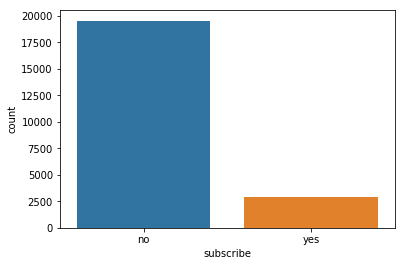

In [252]:
sns.countplot(x='subscribe', data=train)
plt.show()

In [253]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

train['subscribe'] = label_encoder.fit_transform(train['subscribe'])

target = train.pop('subscribe')
target

id
1        0
2        1
3        0
4        1
5        0
        ..
22496    1
22497    0
22498    0
22499    0
22500    1
Name: subscribe, Length: 22500, dtype: int32

In [254]:
for f in categorical_feature:
    train[f] = train[f].astype('category')
    test[f] = test[f].astype('category')
    
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 1 to 22500
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               22500 non-null  int64   
 1   job               22500 non-null  category
 2   marital           22500 non-null  category
 3   education         22500 non-null  category
 4   default           22500 non-null  category
 5   housing           22500 non-null  category
 6   loan              22500 non-null  category
 7   contact           22500 non-null  category
 8   month             22500 non-null  category
 9   day_of_week       22500 non-null  category
 10  duration          22500 non-null  int64   
 11  campaign          22500 non-null  int64   
 12  pdays             22500 non-null  int64   
 13  previous          22500 non-null  int64   
 14  poutcome          22500 non-null  category
 15  emp_var_rate      22500 non-null  float64 
 16  cons_price_index  2250

(None, None)

In [255]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[numerical_feature] = scaler.fit_transform(train[numerical_feature])
test[numerical_feature] = scaler.fit_transform(test[numerical_feature])

train, test

(            age           job   marital            education  default  \
 id                                                                      
 1      0.876440        admin.  divorced  professional.course       no   
 2      0.793699      services   married          high.school  unknown   
 3      0.628215   blue-collar  divorced             basic.9y       no   
 4     -1.192102  entrepreneur    single          high.school      yes   
 5      0.379990        admin.    single    university.degree       no   
 ...         ...           ...       ...                  ...      ...   
 22496 -0.612910        admin.   married          high.school       no   
 22497 -0.530168        admin.  divorced          high.school       no   
 22498 -1.274843        admin.   married  professional.course       no   
 22499  1.372890       retired   married          high.school       no   
 22500  0.297249   blue-collar   married             basic.9y  unknown   
 
        housing     loan    contact 

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'n_estimators': 1000,
        'subsample': trial.suggest_float('subsample', 0.7, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1),
        'metric': 'auc',
        'verbose': -1,
        'random_state': 2024
    }

    cla = LGBMClassifier(**params)
    
    x_train, x_test, y_train, y_test = train_test_split(train, target)
    cla.fit(x_train, y_train, categorical_feature = categorical_feature)
    
    y_predict = cla.predict(x_test, categorical_feature = categorical_feature, num_iteration=cla.best_iteration_)

    return roc_auc_score(y_test, y_predict)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


[I 2024-11-23 15:41:23,930] A new study created in memory with name: no-name-bfe1e0de-1f12-4e95-b6f6-89703cd9ef3f
[I 2024-11-23 15:41:24,962] Trial 0 finished with value: 0.6619089865358522 and parameters: {'learning_rate': 0.03921980466879775, 'subsample': 0.9159787960387746, 'colsample_bytree': 0.8639685298023869}. Best is trial 0 with value: 0.6619089865358522.
[I 2024-11-23 15:41:26,119] Trial 1 finished with value: 0.6596463828750735 and parameters: {'learning_rate': 0.007977117447307133, 'subsample': 0.976045710235478, 'colsample_bytree': 0.9561397167987653}. Best is trial 0 with value: 0.6619089865358522.
[I 2024-11-23 15:41:27,379] Trial 2 finished with value: 0.5 and parameters: {'learning_rate': 1.3732524739215496e-05, 'subsample': 0.8412866010019795, 'colsample_bytree': 0.845043471577495}. Best is trial 0 with value: 0.6619089865358522.
[I 2024-11-23 15:41:28,596] Trial 3 finished with value: 0.5 and parameters: {'learning_rate': 0.0003430836145240413, 'subsample': 0.7647793

In [ ]:
best_params = study.best_params
print(f'best params:{best_params}')
cla = LGBMClassifier(**best_params)

x_train, x_test, y_train, y_test = train_test_split(train, target, random_state=2024)
cla.fit(x_train, y_train, categorical_feature = categorical_feature)

y_predict = cla.predict(x_test, categorical_feature = categorical_feature, num_iteration=cla.best_iteration_)

score = roc_auc_score(y_test, y_predict)
score


best params:{'learning_rate': 0.07087281159522622, 'subsample': 0.852457667096901, 'colsample_bytree': 0.8502180584620533}


0.6534593251337212

In [260]:
kf = KFold(n_splits = 5, shuffle=True, random_state=2024)
probas = [0] * len(test)
valid_score = 0
for train_index, test_index in kf.split(train):
    x_train, x_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    cla.fit(x_train, y_train, categorical_feature = categorical_feature)
    
    y_predict = cla.predict_proba(test, categorical_feature = categorical_feature, num_iteration=cla.best_iteration_)
    for i in range(len(test)):
        probas[i] += y_predict[i][0]/5

In [261]:
data = {
    'id': test.index,
    'subscribe': [('no' if i > 0.5 else 'yes') for i in probas]
}

submission = pd.DataFrame(data)
submission.to_csv('submission.csv', index=None)
